# Example Of Jupyter Notebooks With Titanic Survivor Dataset

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

## Loading data

In [2]:
fn = 'data/train.csv'
df = pd.read_csv(fn)

## Basic info about the data

A sample of the data:

In [49]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


General info about data:

In [57]:
print('Data size:',
      '\n- Number of variables:', df.shape[1],
      '\n- Number of observations:', df.shape[0], 
      end='\n\n')

print('Variable names:', '\n' + str(list(df.columns)), end='\n\n')
print('Number of missing observations per variable:')
print(np.sum(pd.isnull(df), axis=0))

Data size: 
- Number of variables: 12 
- Number of observations: 891

Variable names: 
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Number of missing observations per variable:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data manipulation and plotting

In [39]:
females = len(df[df.Sex=='female'])
males = len(df[df.Sex=='male'])

print('Female passengers:', females)
print('Male passengers:', males, '\n')

# Group by sex and determine what percentage survived
survived_by_sex = df.groupby(by='Sex')['Survived'].mean()

print(survived_by_sex)

Female passengers: 314
Male passengers: 577 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


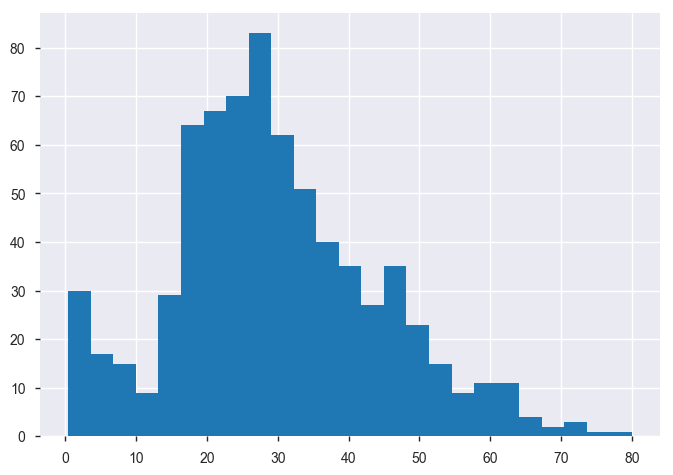

In [46]:
plt.figure(0)
plt.hist(df[pd.notnull(df.Age)]['Age'],
         bins = 25)
plt.show()

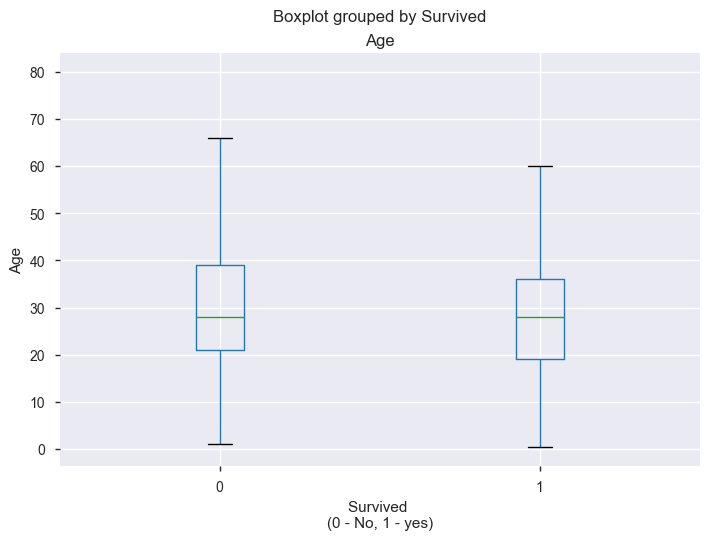

In [47]:
plt.figure(1)
df.boxplot('Age', by='Survived')
plt.ylabel('Age')
plt.xlabel('Survived \n(0 - No, 1 - yes)')
plt.show()

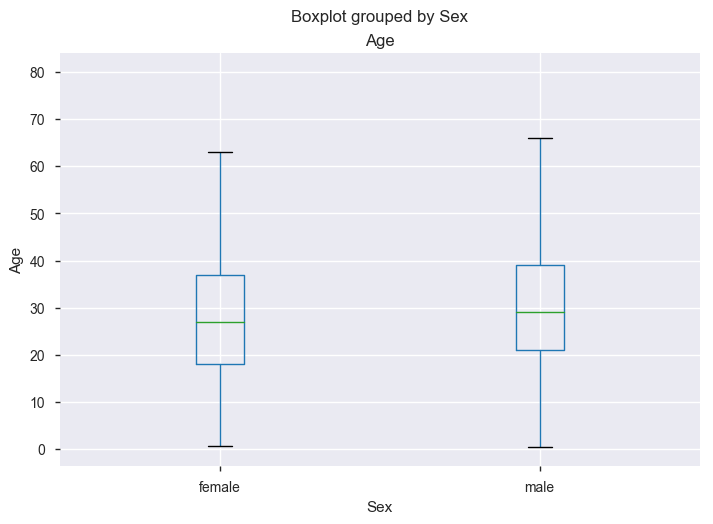

In [48]:
plt.figure(2)
df.boxplot('Age', by='Sex')
plt.ylabel('Age')
plt.show()

## Some quick stats using 3rd party library

In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0
